In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [5]:
df = pd.read_csv('./data/sample_consensus.csv').drop(columns=['Unnamed: 0'])
df

,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
5,voters want free and fair elections when im go...,1
6,massive crowds last evening for the meeting on...,1
7,several questions have come my way since the a...,0
8,brad recently stopped by to talk to henry hint...,0
9,british chickens are typically fed on soya fro...,0


In [6]:
# creating prediction model

# creating the filters 
filters =  ['unanimous', 'unison', 'common', 'unanimously', 'commonly', 'citizens need', 
            'most poeple', 'more people' , 'donors', 'participants', 'voters think', 'voters believe', 
            'voters advocate', 'voters want', 'we want', 'americans want',  
            'everyone agrees', 'everyone thinks', 'everyone believes', 'we all', 'majority']

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.429
              precision    recall  f1-score   support

no consensus       0.38      1.00      0.56         5
   consensus       1.00      0.11      0.20         9

    accuracy                           0.43        14
   macro avg       0.69      0.56      0.38        14
weighted avg       0.78      0.43      0.33        14

confusion matrix:
[[5 0]
 [8 1]]



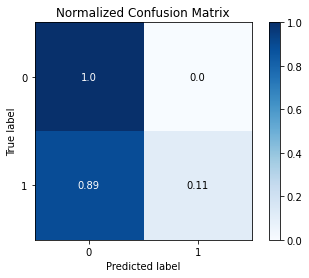

In [8]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['consensus'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['consensus'], y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['consensus'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['consensus'], y_pred, normalize=True)
plt.show()